## STAT 207 Lab 2: Data Frames and Statistics

Due: Wednesday, February 5, 23:59:59

### Michael Cao AND minhcao2

This lab consists of 3 main parts. You may add as many cells as you need in order to do the excercises. To add cells use the "Insert" tab from the menu bar above and select "insert cell above" or "insert cell below". 

**The most relevant lectures notes for this lab are "02_dataframe" and "03_quant".**

Please use Markdown cells above or below your code cells to explain your results. Make sure graders know that you understand what your code is doing.

The data file "spam_sample.csv" is included in the release. It contains several quantitative measurements of email messages along with a label (spam=1 or spam=0).

### Part 1 (10 pts)
 

**a) (2 pts) Using python commands, read the data file "spam_sample.csv" into a pandas data frame, being sure to import any libraries that you need.  Display the first 10 rows of the data.**

In [1]:
import pandas as pd
df= pd.read_csv("spam_sample.csv")

In [2]:
df.head(n=10)

,char_freq_!,char_freq_$,capital_run_length_average,spam
0,0.000,0.000,3.657,0
1,0.000,0.000,3.300,0
2,0.080,0.000,2.396,0
3,0.286,0.000,2.724,0
4,0.000,0.123,2.854,0
5,0.000,0.000,2.187,0
6,0.000,0.000,1.333,0
7,0.000,0.000,2.333,0
8,0.000,0.389,3.476,1
9,0.000,0.000,1.000,0


In [4]:
counts = df["spam"].value_counts()
display(counts)

0    120
1     80
Name: spam, dtype: int64

**b) (2 pts) Notice that in python (pandas) the row numbering starts from index=0 rather than index=1. Using python/pandas commands, display the rows of your data frame with index values =5, 6 and 7.**

In [34]:
df.iloc[[5,6,7],:]

,char_freq_!,char_freq_$,capital_run_length_average,spam
5,0.0,0.0,2.187,0
6,0.0,0.0,1.333,0
7,0.0,0.0,2.333,0


**c) (2 pts) Using python/pandas commands, copy only rows of the data frame for which "char_freq_!" is positive (> 0) into a new data frame, and display the first 10 rows of the new data frame.**

In [6]:
df1 = df[ df["char_freq_!"] > 0]
df1.head(n=10)

,char_freq_!,char_freq_$,capital_run_length_average,spam
2,0.080,0.000,2.396,0
3,0.286,0.000,2.724,0
10,1.244,0.000,2.472,1
13,0.145,0.121,3.575,1
16,0.146,0.000,2.058,1
17,0.129,0.000,5.800,1
18,0.278,0.230,3.887,1
19,0.223,0.223,2.021,1
21,0.064,0.000,3.587,0
24,0.200,0.000,1.064,1


**d) (2 pts) Using python/pandas commands, find the proportion of spam messages (spam=1) among all the messages that have positive values for "char_freq_!".**

In [10]:


dfspam = df1[ df1["spam"] == 1] 
p = len(dfspam) / len(df1)
p

0.7528089887640449

**e) (2 pts) What is the proportion of non-spam messages (spam=0) among all messages that have "char_freq_!" equal to zero? Check using python commands.**

In [12]:
df2 = df[ df["char_freq_!"] == 0]
dfnonspam = df2[ df2["spam"] == 0]
proportion_nonspam = len(dfnonspam)/len(df2)
proportion_nonspam

0.8828828828828829

### Part 2 (8 pts)

**This exercise uses the data from Part 1.**

**a) (2 pts) Importing any relevant python libraries, display a density histogram or distribution plot of "capital_run_length_average".**

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

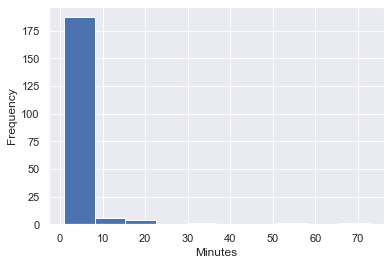

In [50]:
df["capital_run_length_average"].hist()
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**b) (2 pts) Display a density histogram or distribution plot of "capital_run_length_average" for the messages with spam=0 only.**

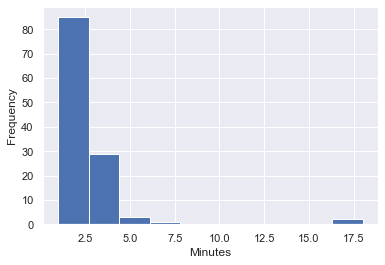

In [51]:
df[df['spam'] == 0][ "capital_run_length_average"].hist()
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**c) (2 pts) Display a density histogram or distribution plot of "capital_run_length_average" for the messages with spam=1 only.**

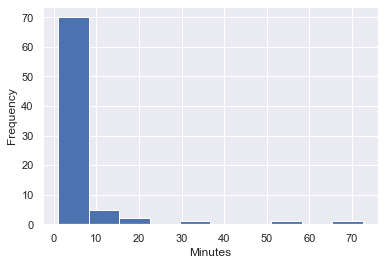

In [52]:
df[df['spam'] == 1][ "capital_run_length_average"].hist()
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

**d) (2 pts) Explain briefly how the distributions of "capital_run_length_average" differ between the spam messages and the non-spam messages.**

#The distribution of amount of time of the call in spam call is larger than the distribution of non spam call

### Part 3 (7 pts)

**This exercise uses the data from Part 1.**

**a) (3 pts) Using python commands, compute and display the minimum, maximum, median and first and third quartiles (25th and 75th percentiles) of "capital_run_length_average" for the whole data set.**

In [35]:
def mysummary(series):
    index = ['min', 'Q1', 'med', 'Q3', 'max', 'mean', 'std']
    value = [series.min(), 
             series.quantile(q=0.25), 
             series.median(), 
             series.quantile(q=0.75),
             series.max(),
             series.mean(),
             series.std()]
    return pd.DataFrame({'value': value}, index=index)
mysummary(df["capital_run_length_average"])

,value
min,1.000000
Q1,1.727750
med,2.509500
Q3,3.755000
max,72.500000
mean,4.105730
std,7.071709


**b) (1 pt) Repeat the computations in a) but only for the spam messages.**

In [36]:
mysummary(df[ df["spam"] == 1]["capital_run_length_average"])

,value
min,1.064000
Q1,2.396000
med,3.843500
Q3,6.096250
max,72.500000
mean,6.454050
std,10.437313


**c) (1 pt) Repeat the computations in a) but only for the non-spam messages.**

In [37]:
mysummary(df[ df["spam"] == 0]["capital_run_length_average"])

,value
min,1.000000
Q1,1.583750
med,2.029000
Q3,2.891500
max,18.000000
mean,2.540183
std,2.264933


**d) (2 pts) Display side by side box plots or violin plots of "capital_run_length_average" for non-spam and spam messages.** 

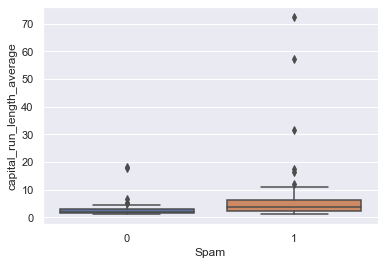

In [47]:
sns.boxplot(x= "spam", y= "capital_run_length_average", data=df)
plt.xlabel("Spam")
plt.ylabel("capital_run_length_average")
plt.show()
#



In [39]:
df

,char_freq_!,char_freq_$,capital_run_length_average,spam
0,0.000,0.000,3.657,0
1,0.000,0.000,3.300,0
2,0.080,0.000,2.396,0
3,0.286,0.000,2.724,0
4,0.000,0.123,2.854,0
...,...,...,...,...
195,0.081,0.816,3.400,1
196,0.000,0.000,1.903,0
197,0.000,0.000,1.428,0
198,0.000,0.000,2.593,0
